In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_pinball_loss
from IPython.display import clear_output
from prophet import Prophet

In [10]:
# pandas setting
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [11]:
# read data
train_data = pd.read_csv("../data/train_data.csv", index_col='id')
test_data = pd.read_csv('../data/test_data.csv', index_col='id')
submissoin_data = pd.read_csv('../data/submission.csv')

In [16]:
train_data.columns

Index(['date', 'highest', 'lowest', 'rain', 'ice1', 'ice2', 'ice3', 'oden1',
       'oden2', 'oden3', 'oden4', 'hot1', 'hot2', 'hot3', 'dessert1',
       'dessert2', 'dessert3', 'dessert4', 'dessert5', 'drink1', 'drink2',
       'drink3', 'drink4', 'drink5', 'drink6', 'alcol1', 'alcol2', 'alcol3',
       'snack1', 'snack2', 'snack3', 'bento1', 'bento2', 'bento3', 'bento4',
       'tild1', 'tild2', 'men1', 'men2', 'men3', 'men4', 'men5', 'men6'],
      dtype='object')

In [55]:
df = pd.DataFrame(train_data[['date', 'dessert1']])
df.head()

,date,dessert1
id,,
1,4/11,42
2,4/12,22
3,4/13,20
4,4/14,21
5,4/15,44


In [56]:
df.columns = ['ds', 'y']

In [57]:
df['ds'] = '2022/' + df['ds'].replace('/', '-')

In [58]:
df.head()

,ds,y
id,,
1,2022/4/11,42
2,2022/4/12,22
3,2022/4/13,20
4,2022/4/14,21
5,2022/4/15,44


In [73]:
df.loc[:21, 'y']

id
1     42
2     22
3     20
4     21
5     44
6     36
7     33
8     50
9     31
10    24
11    26
12    43
13    23
14    23
15    43
16    37
17    32
18    31
19    48
20    25
21    25
Name: y, dtype: int64

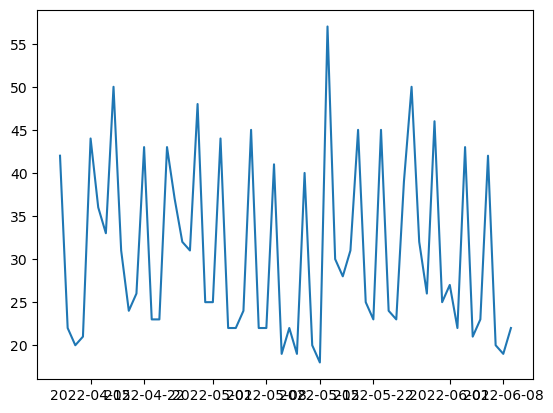

In [77]:
plt.plot(df.loc[:60, 'ds'], df.loc[:60, 'y'])
plt.show()

In [59]:
df['ds'] = pd.to_datetime(df['ds'])

In [60]:
df.head()

,ds,y
id,,
1,2022-04-11,42
2,2022-04-12,22
3,2022-04-13,20
4,2022-04-14,21
5,2022-04-15,44


In [61]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -8.50392

/home/takafumi/anaconda3/envs/PS_env/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       520.978   6.19889e-07       96.9251      0.7475      0.7475      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     115       520.978   5.62759e-09       97.9128        0.28        0.28      153   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
